In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

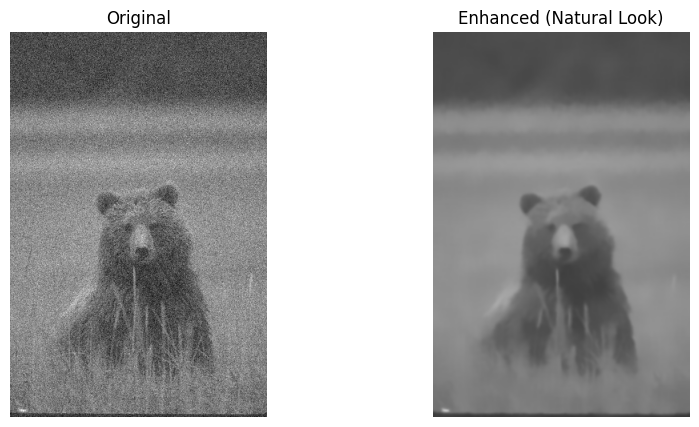

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to display images (for debugging or visualization)
def show_img(img, title="Image", cmap_type='gray'):
    plt.figure(figsize=(10, 10))
    if len(img.shape) == 2:
        plt.imshow(img, cmap=cmap_type)
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")
    plt.show()

# Main enhancement function
def enhance_natural_image(img_path):
    # Step 1: Load grayscale image
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Image not found at path: {img_path}")

    # Step 2: Denoise (Gaussian + Non-local Means)
    blurred = cv2.GaussianBlur(img, (5, 5), 0)
    denoised = cv2.fastNlMeansDenoising(blurred, h=15, templateWindowSize=7, searchWindowSize=21)

    # Step 3: Convert to RGB (for natural color tone)
    rgb_result = cv2.cvtColor(denoised, cv2.COLOR_GRAY2BGR)

    return rgb_result

# Example usage
img_path = "assets/gambar4.jpg"
enhanced = enhance_natural_image(img_path)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(enhanced)
plt.title("Enhanced (Natural Look)")
plt.axis("off")
plt.show()
